# Data Import

In [1]:
# Import libraries
import os
import pandas as pd

In [2]:
date = "4-15-2025"
data_list = []
name_list = []

In [3]:
directory_str = "../data/" + date + "/"
for file in os.listdir(directory_str):
    name_list.append(file)
    data_list.append(pd.read_csv(directory_str + file, delimiter=";"))

# Data Cleaning

In [4]:
X_COL = "Flow EZ #2 (12806) - Setpoint"
Y_COL = "Flow Unit #1 [Flow EZ #1 (11411)]"

### Forward

In [5]:
df_0 = data_list[0]
name_list[0]

'PC_VIPS_DiodeTest_20250415_forward_chip1.csv'

In [6]:
df_0 = df_0[[X_COL, Y_COL]]

In [7]:
df_0

,Flow EZ #2 (12806) - Setpoint,Flow Unit #1 [Flow EZ #1 (11411)]
0,0,-1.1
1,10,-1.1
2,10,-0.8
3,10,-0.8
4,10,-1.1
...,...,...
4001,105,463.7
4002,105,465.4
4003,105,465.9
4004,105,464.3


### Reverse

In [8]:
df_1 = data_list[1]
name_list[1]

'PC_VIPS_DiodeTest_20250415_reverse_chip 1.csv'

In [9]:
df_1 = df_1[[X_COL, Y_COL]]

In [10]:
df_1

,Flow EZ #2 (12806) - Setpoint,Flow Unit #1 [Flow EZ #1 (11411)]
0,0,-0.6
1,10,-0.8
2,10,-0.8
3,10,-0.6
4,10,-0.8
...,...,...
3800,100,158.9
3801,100,159.4
3802,100,159.4
3803,100,159.2


# Data Analysis

In [11]:
import numpy as np

from scipy.stats import linregress
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_line,
    ggtitle,
    labs,
    annotate,
    xlim,
    ylim,
    scale_color_manual,
)

In [12]:
X_LABEL = "Pressure In (mb)"
Y_LABEL = "Flow Rate Out (µL/min)"

### Forward

In [13]:
df_clean_0 = df_0[df_0[X_COL] > 0].copy()

In [14]:
# Use scipy to find the logarithmic fit and fitting parameters
log_x = np.log(df_clean_0[X_COL])
y = df_clean_0[Y_COL]

a_log, b_log, r_log, _, _ = linregress(log_x, y)

df_clean_0['log_fit'] = a_log * log_x + b_log

In [15]:
# Linear Fit
a_lin, b_lin, r_lin, _, _ = linregress(df_clean_0[X_COL], df_clean_0[Y_COL])

df_clean_0['lin_fit'] = a_lin * df_clean_0[X_COL] + b_lin

In [16]:
# Convert values to strings
equation_text = f"y = {a_log:.3f} * ln(x) + {b_log:.3f}"
r_text = f"R = {r_log:.3f}"

In [17]:
# Melt data for legend support
df_long = pd.melt(
    df_clean_0,
    id_vars=[X_COL, Y_COL],
    value_vars=['log_fit', 'lin_fit'],
    var_name='Fit Type',
    value_name='Fit Value'
)

# Rename for legend
fit_labels = {'log_fit': 'Logarithmic Fit', 'lin_fit': 'Linear Fit'}
df_long['Fit Type'] = df_long['Fit Type'].map(fit_labels)

c:\Users\alper\Documents\Code\vips_data_analysis\venv\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 64 rows containing missing values.


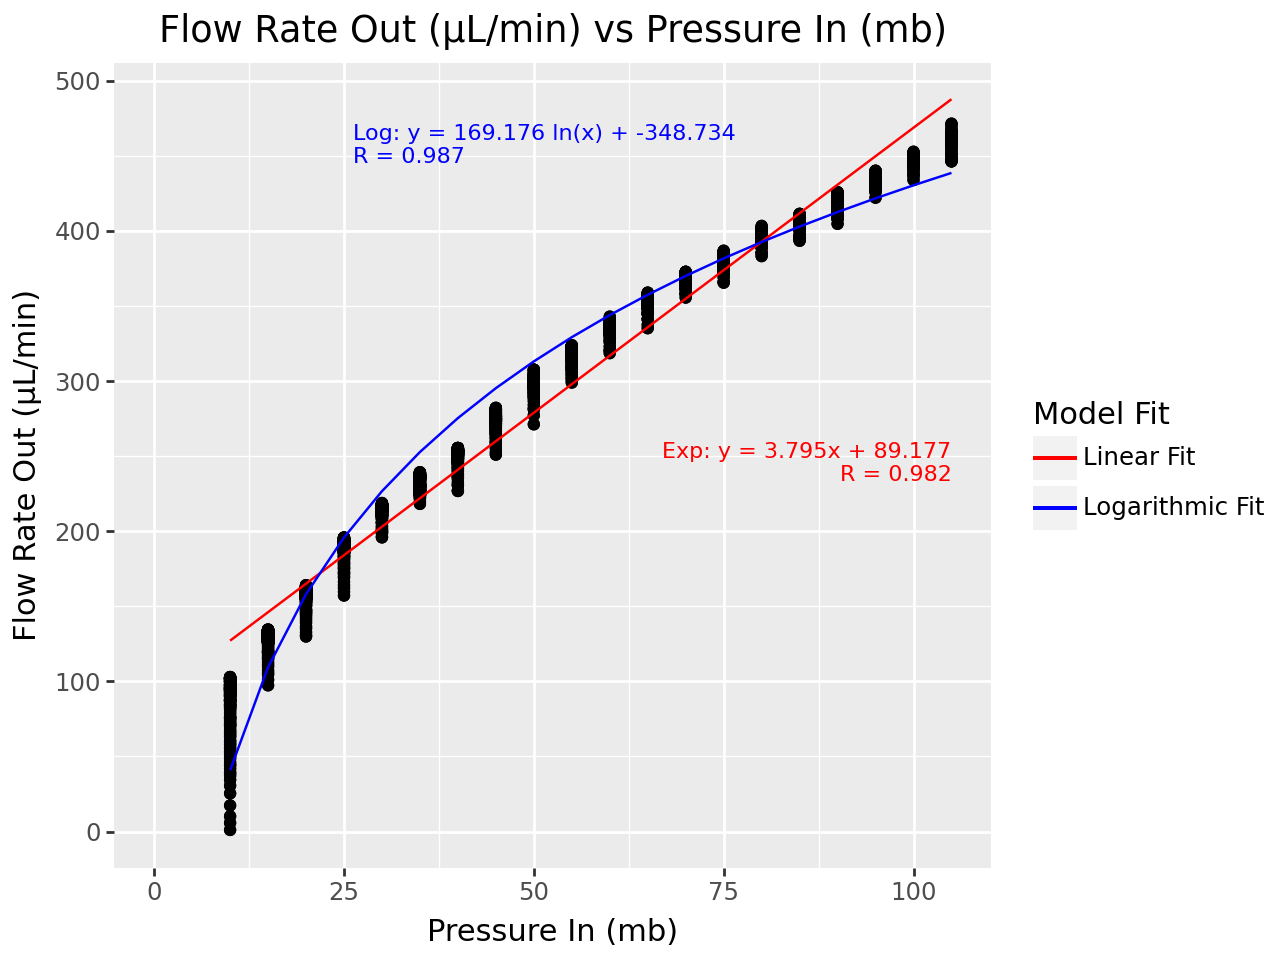

In [18]:
(
    ggplot(df_long, aes(X_COL, Y_COL)) +
    geom_point() +
    geom_line(
        aes(
            y='Fit Value',
            color='Fit Type'
        )
    ) +
    scale_color_manual(
        values = {
            'Logarithmic Fit': 'blue',
            'Linear Fit': 'red'
        }
    ) +
    ggtitle(f"{Y_LABEL} vs {X_LABEL}") +
    labs(
        x=X_LABEL,
        y=Y_LABEL,
        color="Model Fit"
    ) +
    xlim(0, None) +
    ylim(0, None) +
    annotate(
        "text",
        x=df_long[X_COL].max() * 0.25,
        y=df_long[Y_COL].max() * 1.00,
        label=f"Log: y = {a_log:.3f} ln(x) + {b_log:.3f}\nR = {r_log:.3f}",
        ha='left',
        va='top',
        size=8,
        color='blue'
    ) +
    annotate(
        "text",
        x=df_long[X_COL].max() * 1.00,
        y=df_long[Y_COL].max() * 0.55,
        label=f"Exp: y = {a_lin:.3f}x + {b_lin:.3f}\nR = {r_lin:.3f}",
        ha='right',
        va='top',
        size=8,
        color='red'
    )
)

### Reverse

In [19]:
df_log_1 = df_1[df_1[X_COL] > 0].copy()

c:\Users\alper\Documents\Code\vips_data_analysis\venv\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2655 rows containing missing values.


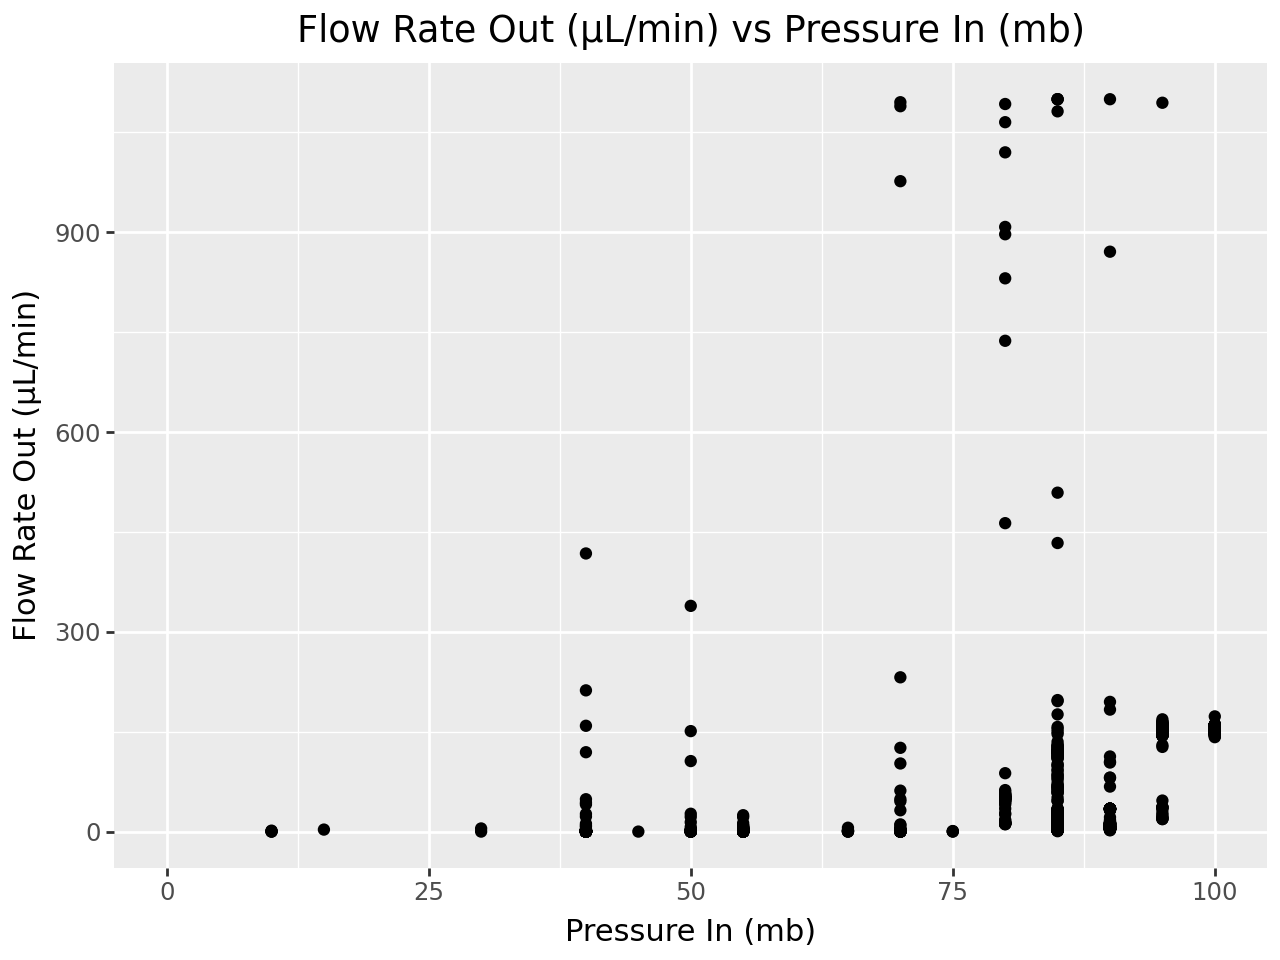

In [20]:
(
    ggplot(df_log_1, aes(X_COL, Y_COL)) +
    geom_point() +
    ggtitle(f"{Y_LABEL} vs {X_LABEL}") +
    labs(
        x=X_LABEL,
        y=Y_LABEL
    ) +
    xlim(0, None) +
    ylim(0, None)
)

In [21]:
df_log_1 = df_1[df_1[Y_COL] > 100].copy()

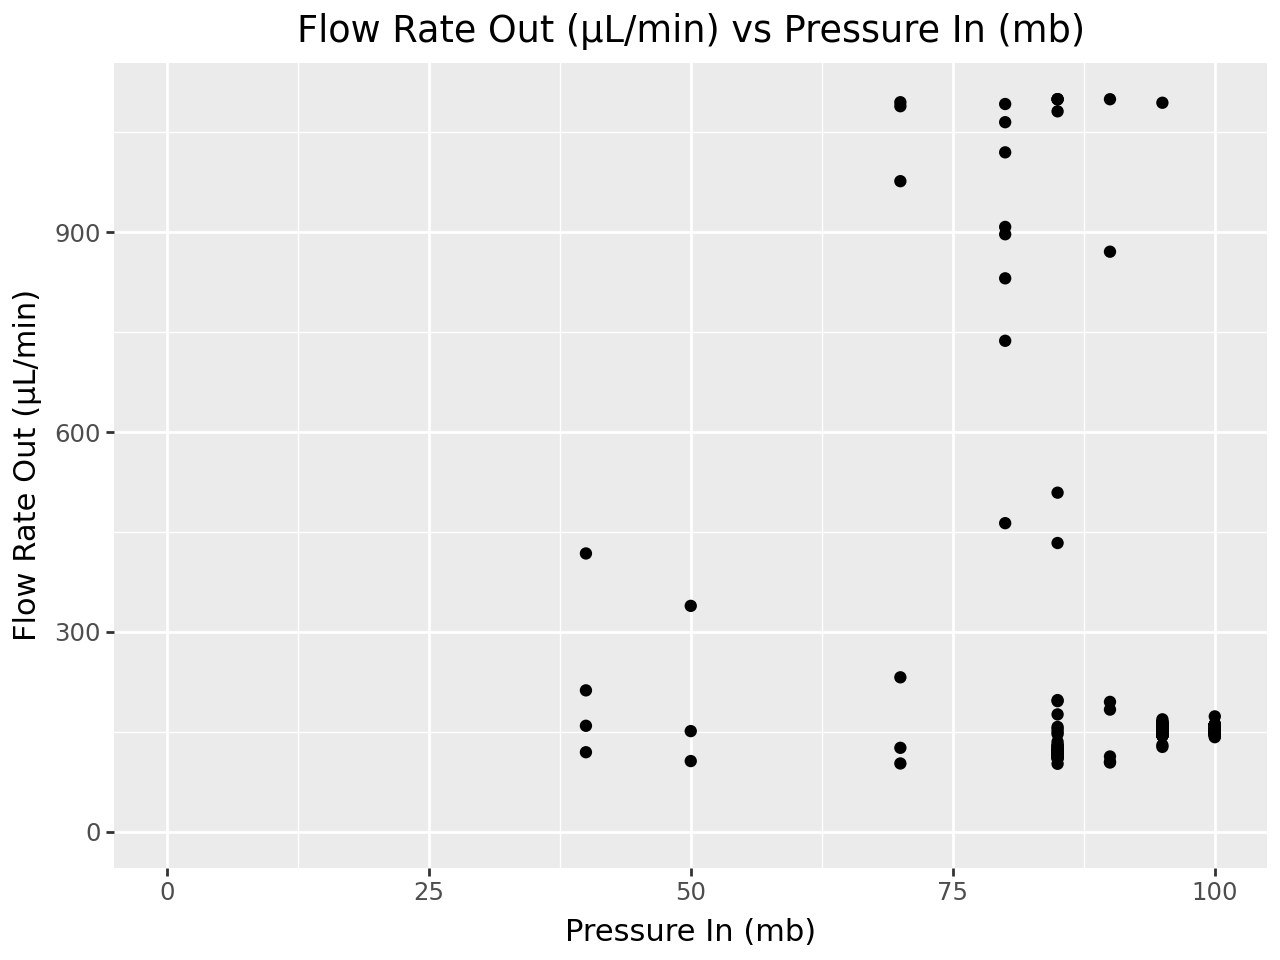

In [22]:
(
    ggplot(df_log_1, aes(X_COL, Y_COL)) +
    geom_point() +
    ggtitle(f"{Y_LABEL} vs {X_LABEL}") +
    labs(
        x=X_LABEL,
        y=Y_LABEL
    ) +
    xlim(0, None) +
    ylim(0, None)
)